In [1]:
# 01_eda.ipynb — Exploratory Data Analysis for Smart Fertilizer Recommender


# ========================
# 1. Import Libraries
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# Style settings
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

In [2]:
# ========================
# 2. Load Dataset
# ========================

# Step 1: Move up one level from 'notebooks' to project root, then into 'data/raw'
RAW = Path('../data/raw/Smart_Fertilizer_Recommender_Dataset.xlsx')

# Step 2: Load the Excel file
df = pd.read_excel(RAW)

# Step 3: Confirm successful load
print('✅ Data Loaded Successfully:', df.shape)

# Step 4: Display first few rows
df.head()


✅ Data Loaded Successfully: (1000, 15)


,Crop_Type,Region,Soil_Type,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Organic_Carbon,Moisture_Content,Rainfall_mm,Temperature_C,Plant_Age_Weeks,Fertilizer_Type,Recommended_Quantity_kg_per_acre,Application_Timing
0,Groundnut,Tamil Nadu,Sandy,4.92,131.63,21.79,242.19,1.57,27.89,955.55,24.98,14,Complex,86.50,Before sowing
1,Sugarcane,Uttar Pradesh,Sandy,7.13,53.08,64.54,65.49,0.57,26.65,756.71,39.50,17,Potash,54.24,Before sowing
2,Millet,Andhra Pradesh,Sandy,7.79,166.59,86.45,194.20,1.48,15.84,146.84,20.65,18,Urea,30.84,Before sowing
3,Cotton,Gujarat,Sandy,6.02,100.62,14.05,79.80,0.24,8.00,895.82,30.30,19,DAP,92.50,Flowering stage
4,Groundnut,Maharashtra,Silty,7.60,140.05,76.07,59.12,0.95,8.18,876.41,25.82,17,MOP,183.12,After sowing


In [3]:
# ========================
# 3. Summary Statistics
# ========================
print('Summary Statistics:')
df.describe(include='all').transpose()

Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Crop_Type,1000,10,Rice,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,1000,8,Tamil Nadu,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soil_Type,1000,5,Silty,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soil_pH,1000.0,NaN,NaN,NaN,6.51055,1.157436,4.5,5.5875,6.515,7.5125,8.49
Nitrogen_Level,1000.0,NaN,NaN,NaN,148.64562,57.406612,50.13,98.2525,147.51,199.475,249.91
Phosphorus_Level,1000.0,NaN,NaN,NaN,54.25456,25.675991,10.0,31.7825,54.075,75.875,99.8
Potassium_Level,1000.0,NaN,NaN,NaN,174.71682,72.405121,51.55,112.3475,172.28,238.055,299.84
Organic_Carbon,1000.0,NaN,NaN,NaN,1.08659,0.5215,0.2,0.63,1.07,1.56,2.0
Moisture_Content,1000.0,NaN,NaN,NaN,21.91547,9.974082,5.01,13.2625,21.83,29.9925,39.96
Rainfall_mm,1000.0,NaN,NaN,NaN,536.46057,253.780569,100.22,326.545,526.745,747.7925,997.29


Missing Values per Column:
Series([], dtype: int64)


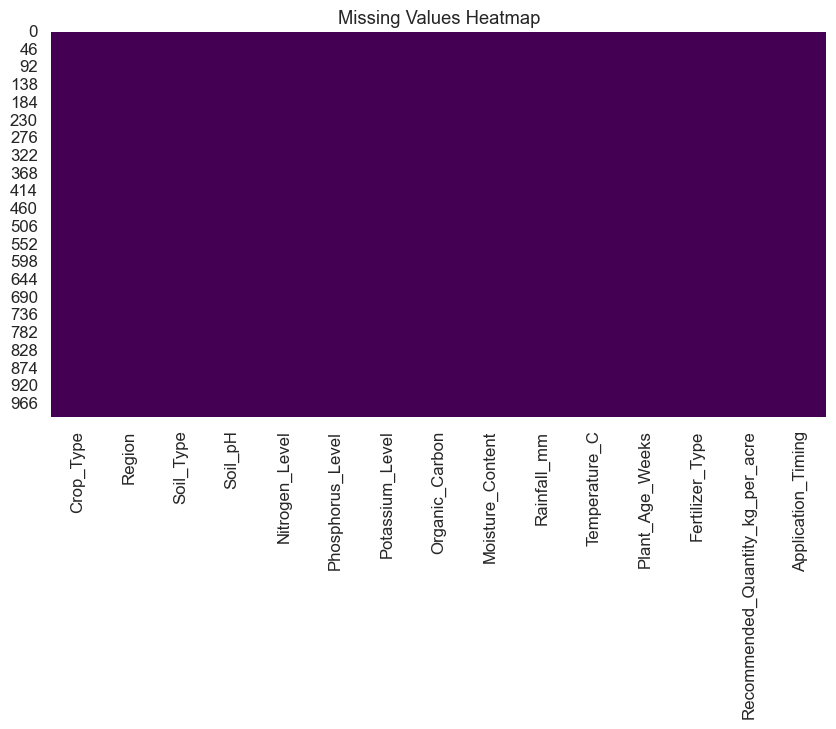

In [4]:
# ========================
# 4. Check for Missing Values
# ========================
missing = df.isnull().sum()
print('Missing Values per Column:')
print(missing[missing > 0])


plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

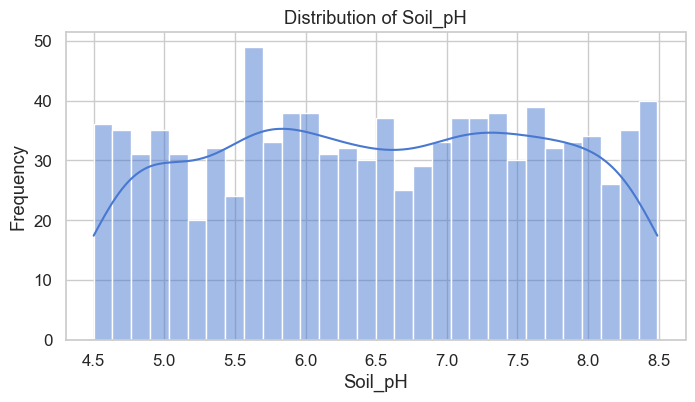

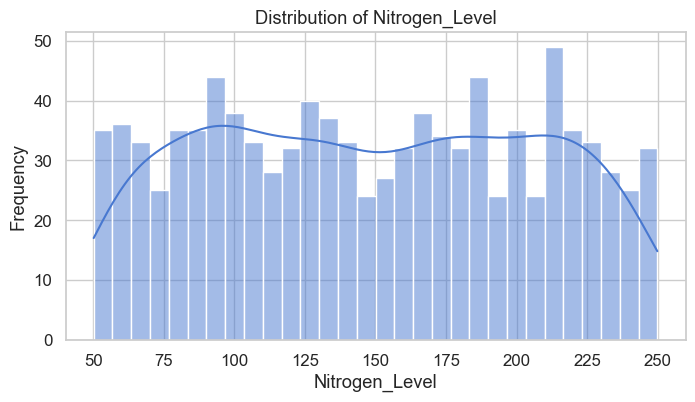

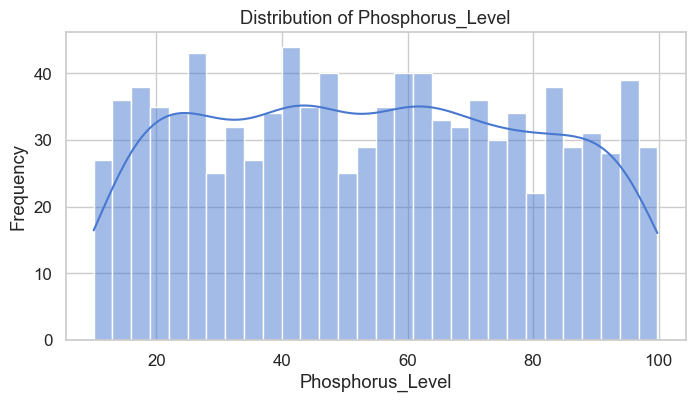

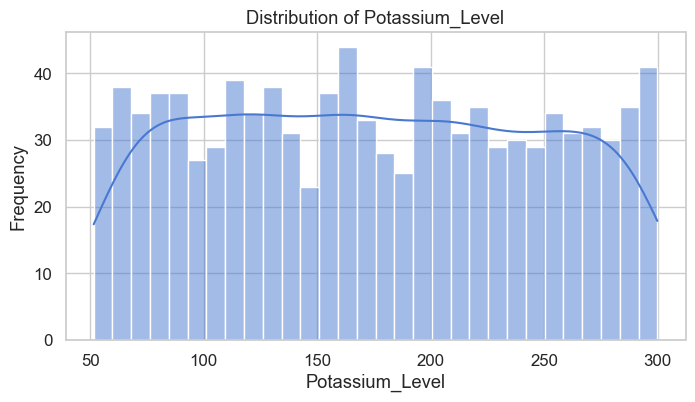

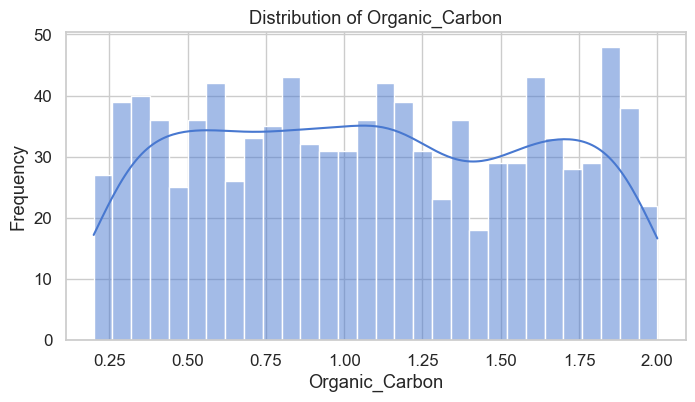

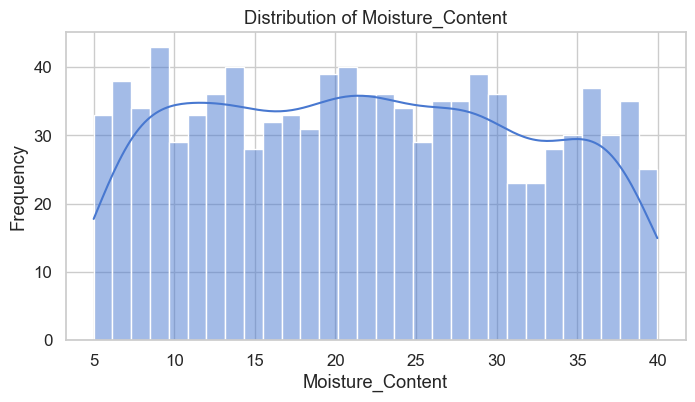

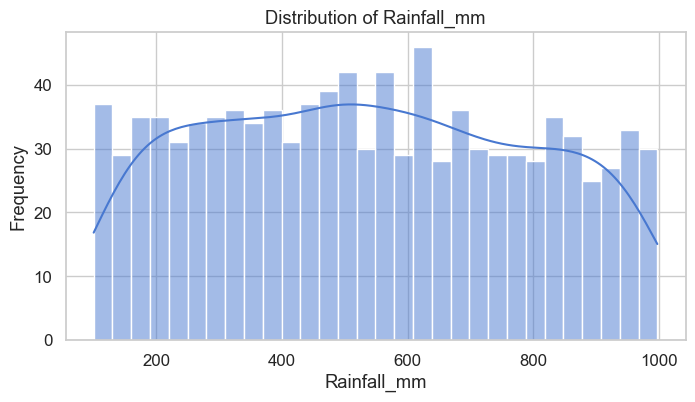

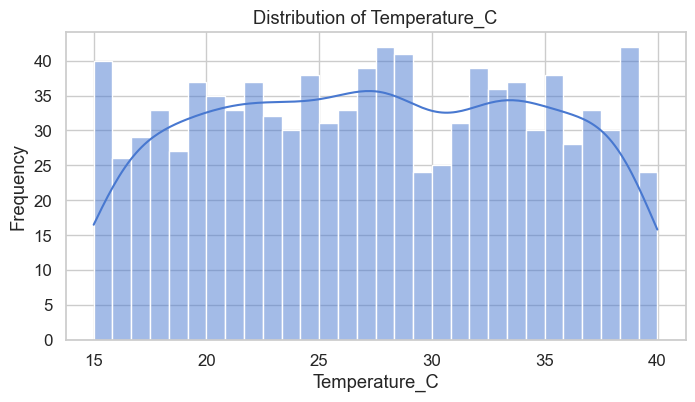

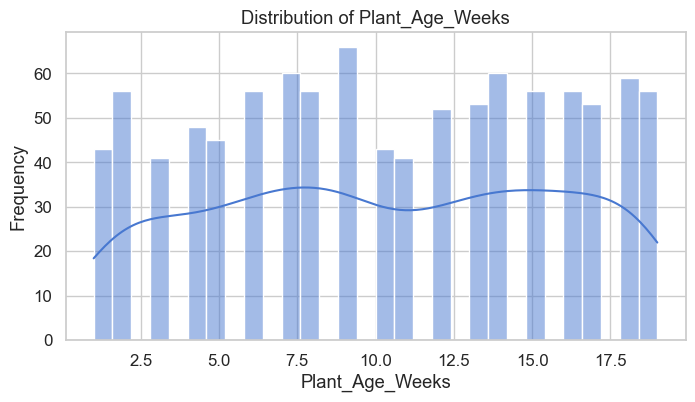

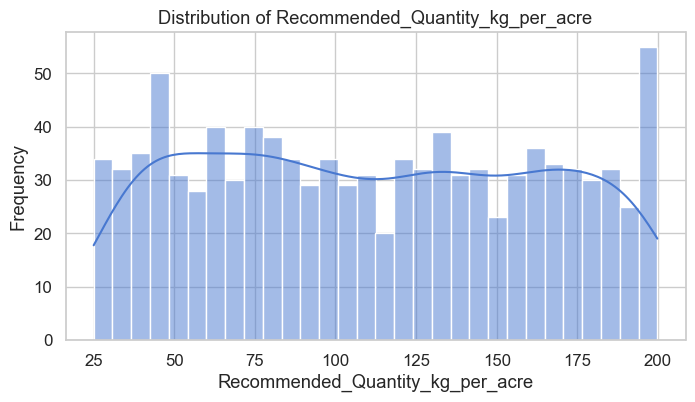

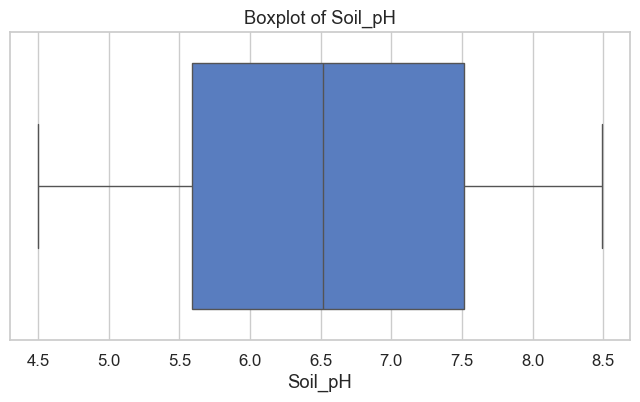

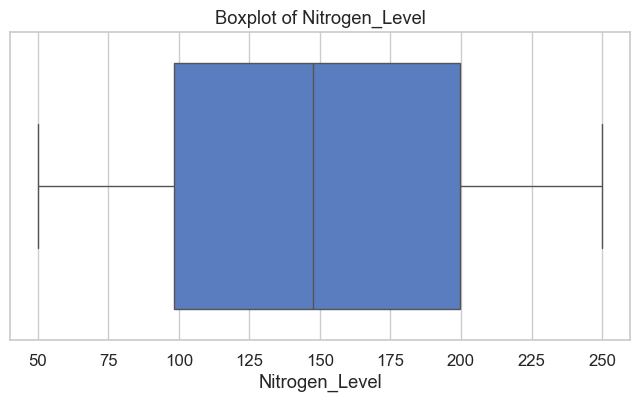

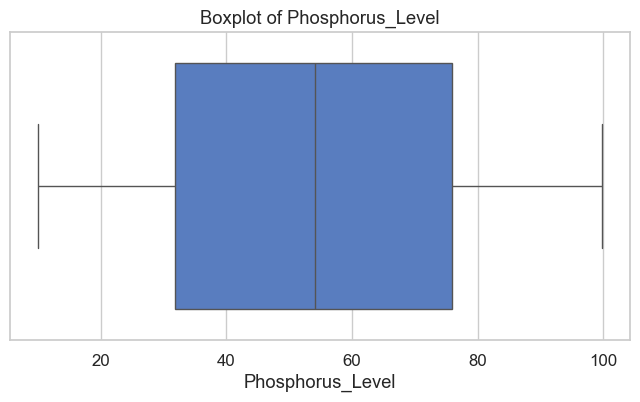

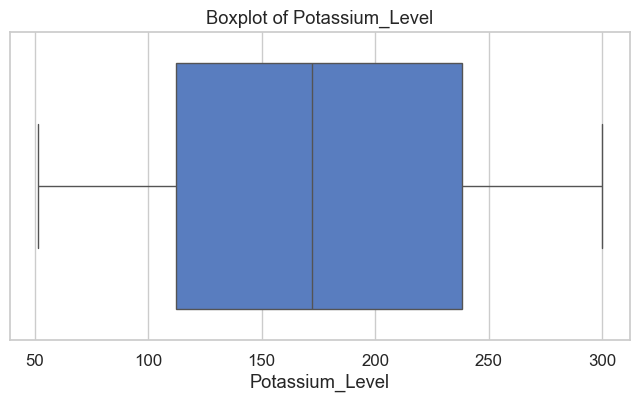

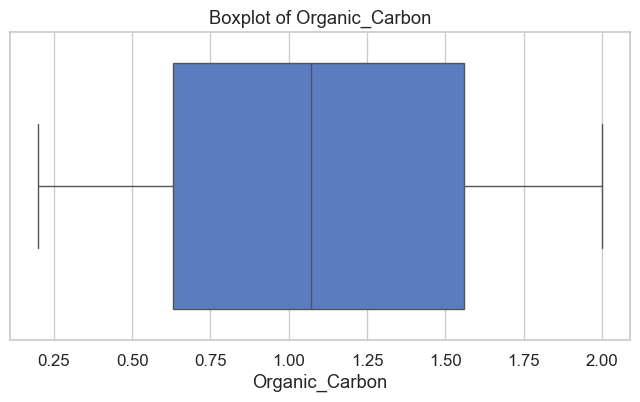

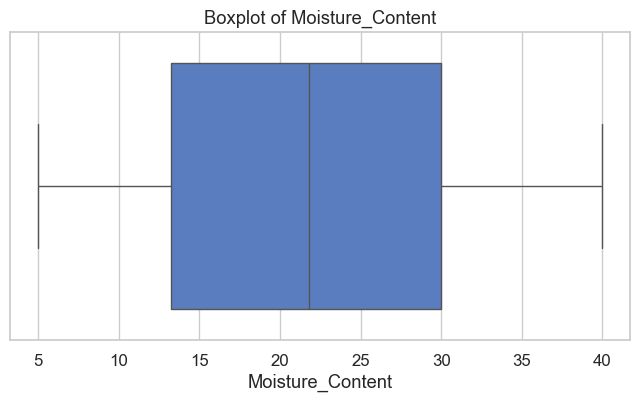

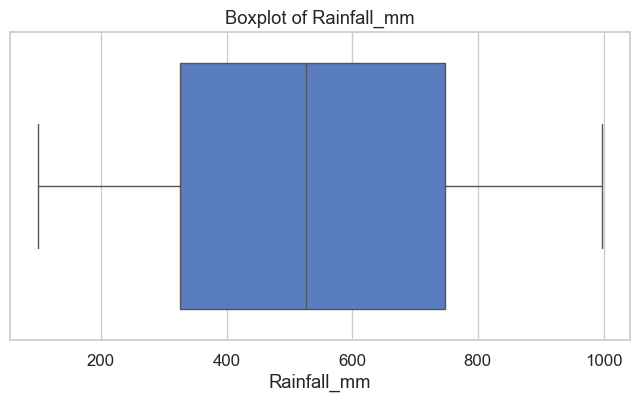

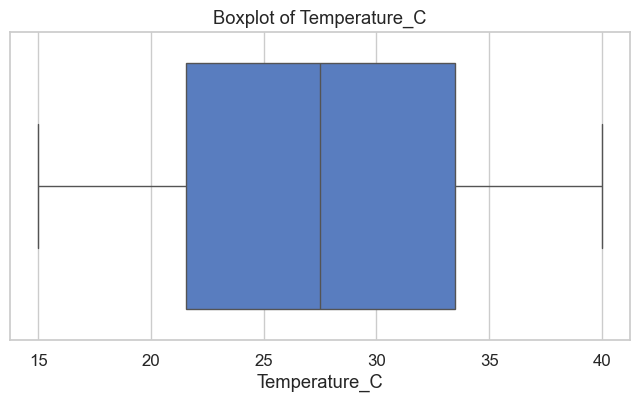

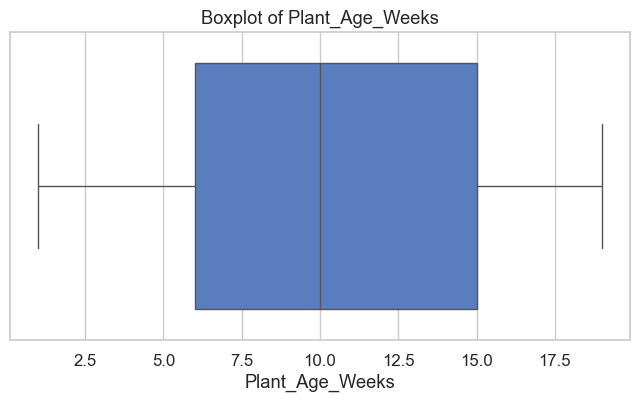

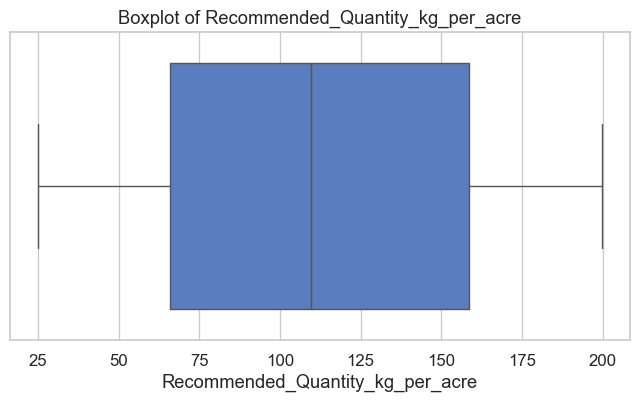

In [5]:
# ========================
# 5. Univariate Analysis
# ========================

# Numeric distributions
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for detecting outliers
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


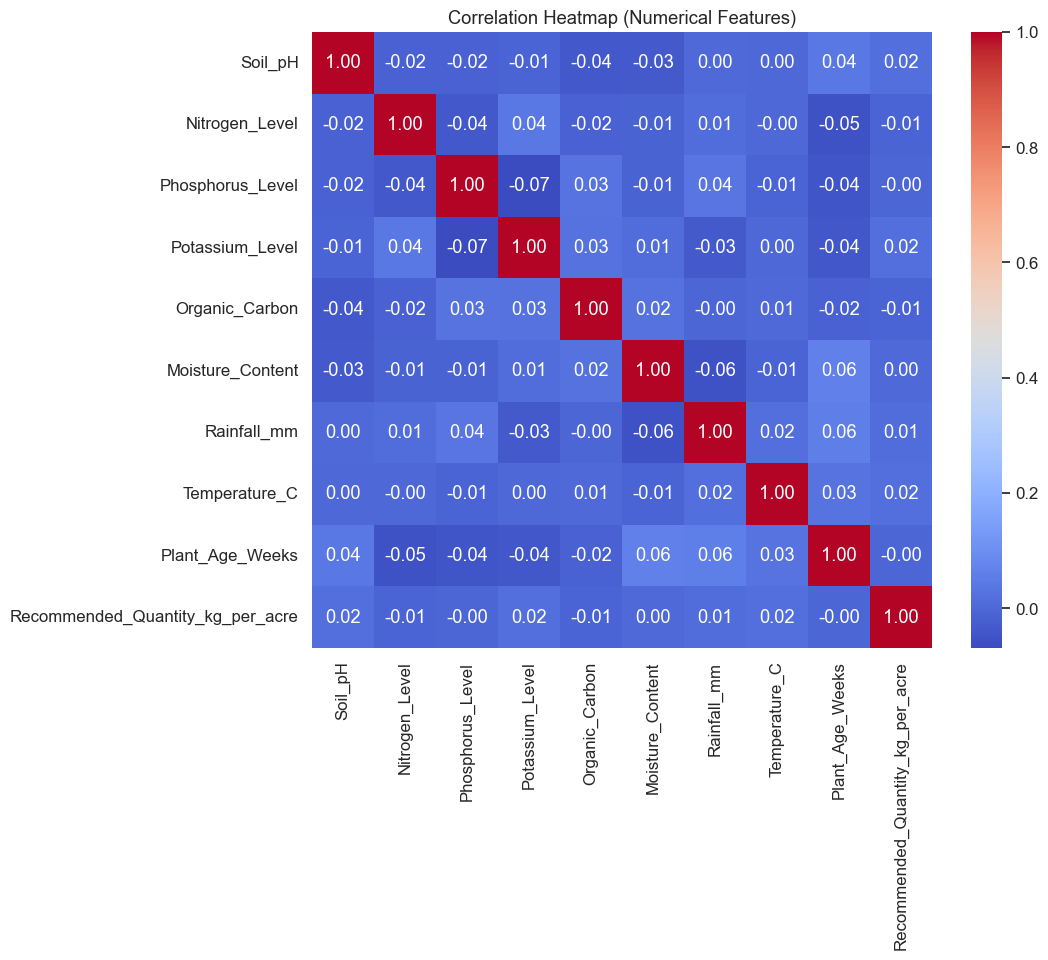

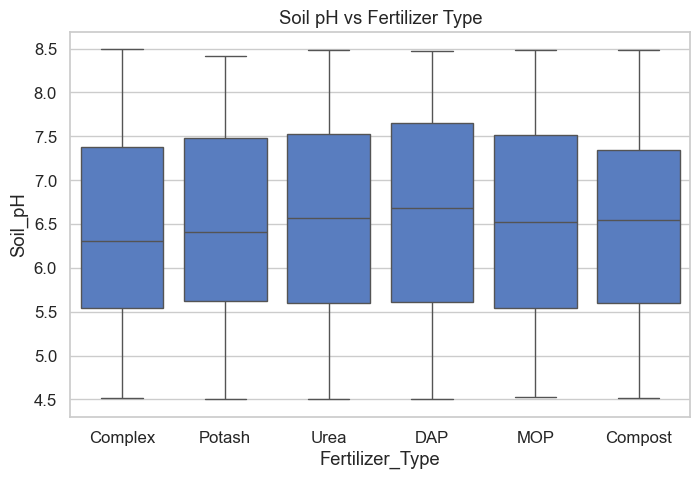

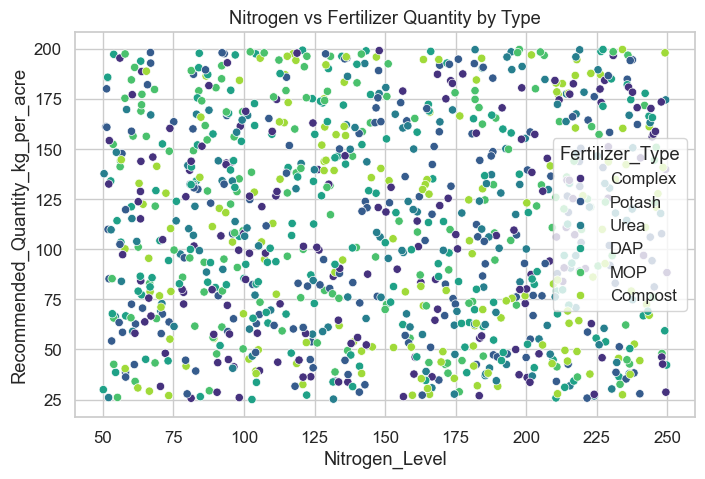

In [6]:
# ========================
# 6. Bivariate Analysis
# ========================

# Correlation heatmap — numeric only
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


# Example: Soil_pH vs Fertilizer_Type
if 'Fertilizer_Type' in df.columns and 'Soil_pH' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Fertilizer_Type', y='Soil_pH')
    plt.title('Soil pH vs Fertilizer Type')
    plt.show()
else:
    print("Columns 'Fertilizer_Type' or 'Soil_pH' not found in the dataset.")


# Example: Nitrogen_Level vs Recommended Quantity
if all(col in df.columns for col in ['Nitrogen_Level', 'Recommended_Quantity_kg_per_acre', 'Fertilizer_Type']):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=df,
        x='Nitrogen_Level',
        y='Recommended_Quantity_kg_per_acre',
        hue='Fertilizer_Type',
        palette='viridis'
    )
    plt.title('Nitrogen vs Fertilizer Quantity by Type')
    plt.show()
else:
    print("Some columns for this plot are missing in the dataset.")


In [7]:
# ========================
# 7. Insights Summary
# ========================


print('Key Observations:')
print('- Check if soil pH clusters around neutral for certain fertilizer types.')
print('- Observe which nutrient (N, P, K) correlates most with fertilizer choice.')
print('- Note any extreme outliers in rainfall or nutrient levels that may need capping.')
print('- Examine feature correlations to decide which variables might be redundant.')

Key Observations:
- Check if soil pH clusters around neutral for certain fertilizer types.
- Observe which nutrient (N, P, K) correlates most with fertilizer choice.
- Note any extreme outliers in rainfall or nutrient levels that may need capping.
- Examine feature correlations to decide which variables might be redundant.
